In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
sns.set_theme()

from Materials import Material, Concrete, Steel
from Sections import Rectangular, Section, HollowRectangular, HollowCircular

In [2]:
frp = Material('FRP', 600e6, 80e9, 'black')
conf_steel = Steel('Confining Steel', 190e9, 355e6, 'blue')
reinf_steel = Steel('Reinforcing Steel', 190e9, 500e6, 'black')
concrete = Concrete('Concrete', 37e9, 50e6, 'gray',conf_steel, reinf_steel)

# test_section = HollowRectangular(concrete, 0.600, 0.600,0.2,0.2,0.20)

test_outer_steel = HollowCircular(conf_steel, 0.508, 0.0125, 0.254, 0.254)
test_concrete = HollowCircular(concrete, 0.483, 0.105, 0.254, 0.254)
test_inner_steel = HollowCircular(conf_steel, 0.273, 0.0063, 0.254, 0.254)

test_section = test_outer_steel+test_concrete+ test_inner_steel
print(test_section.concrete)
# test_section.add_reinforcements(reinf_steel, 0.032, [(0.075,0.075) , (0.525,0.075) , (0.075,0.525) , (0.525,0.525) , (0.225,0.075) , (0.075,0.225) , (0.525,0.225) , (0.225,0.525) , (0.375,0.075) , (0.075,0.375) , (0.375,0.525) , (0.525,0.375)
#        ])

# test_section = Rectangular(concrete, 0.600, 0.600)

# test_outer_steel = HollowRectangular(outer_confining_steel, 0.14, 0.26, 0.1274, 0.2474, 0.0063, 0, 0)
# test_concrete = Rectangular(concrete, 0.1274, 0.2474, 0.0063, 0.0063)
# test_section = test_outer_steel + test_concrete



Concrete


In [3]:
test_section.generate_slices()
# test_section.slices.reinf_steel_area.sum()
test_section.calculate_neutral_axis(7132200, 0.93, 0.45, 0.0125,0.508) # TODO
# print("Neutral axis:", test_section.neutral_axis)
# test_section.slices.to_csv("output.csv")
# test_section.slices
# print(confined_factor_h_a)



AAAAA 0
AAAAA 0
AAAAA 0
AAAAA 0


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 1.7493238926631807 reached.
  warnings.warn(msg, RuntimeWarning)


In [4]:
print(f"Sum Moment: {test_section.slices.total_moment.sum():.2f} Nm")
print(f"Sum Concrete Area: {test_section.slices.concrete_area.sum():.6f} m^2")
print(f"Sum Steel Area: {test_section.slices.reinf_steel_area.sum():.6f} m^2")
print(f"Sum Steel Area: {test_section.slices.conf_steel_area.sum():.6f} m^2")
print(f"Sum Force: {test_section.slices.total_force.sum():.2f} Nm")
print(f"Total Force: {test_section.slices.total_force.sum():.2f} Nm")
print(f"Ratio of reinforcement area to concrete area(ρs): {(test_section.slices.reinf_steel_area.sum() + test_section.slices.conf_steel_area.sum())  / test_section.slices.concrete_area.sum():.4f} -")

# For reinforced sections
print(f"Maximum Design Plastic Resistance (Axial Force): {(test_section.slices.concrete_area.sum() * concrete.design_strength + test_section.slices.reinf_steel_area.sum() * reinf_steel.characteristic_strength/1.15 + test_section.slices.conf_steel_area.sum() * conf_steel.characteristic_strength):.2f} N")
print(f"Characteristic Plastic Resistance (Axial Force): {(test_section.slices.concrete_area.sum() * concrete.characteristic_strength + test_section.slices.reinf_steel_area.sum() * reinf_steel.characteristic_strength + test_section.slices.conf_steel_area.sum() * conf_steel.characteristic_strength):.2f} N")


Sum Moment: -0.00 Nm
Sum Concrete Area: 0.124683 m^2
Sum Steel Area: 0.000000 m^2
Sum Steel Area: 0.024736 m^2
Sum Force: 3532698.66 Nm
Total Force: 3532698.66 Nm
Ratio of reinforcement area to concrete area(ρs): 0.1984 -
Maximum Design Plastic Resistance (Axial Force): 12313807.92 N
Characteristic Plastic Resistance (Axial Force): 15015283.36 N


In [5]:
test_section.second_moments_of_area

{Confining Steel: {'Ixx': 0.0006444468153245565,
  'Iyy': 0.0006444468153245565,
  'Ixy': -4.089007436570798e-19},
 Concrete: {'Ixx': 0.002398616975380691,
  'Iyy': 0.002398616975380691,
  'Ixy': 1.0076824512869324e-19}}

c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


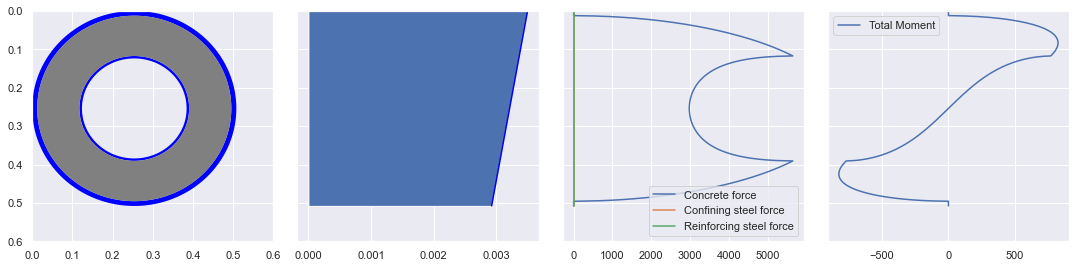

In [6]:

# left  = 0.125  # the left side of the subplots of the figure
# right = 0.125    # the right side of the subplots of the figure
# bottom = 0.1   # the bottom of the subplots of the figure
# top = 0.9      # the top of the subplots of the figure
# wspace = 0.2   # the amount of width reserved for blank space between subplots
# hspace = 0.2   # the amount of height reserved for white space between subplots

fig, axs = plt.subplots(1, 4, sharey=True, squeeze=True, figsize=(16, 4))
                       
axs[0].invert_yaxis()
axs[0].set_ylim(0,0.6)
axs[0].set_xlim(0,0.6)
axs[0].invert_yaxis()

slices = test_section.slices
test_section.plot(axs[0])

for ax in axs:
    ax.axhline(test_section.neutral_axis, color='red')

axs[1].plot(
    slices.strain,
    slices.mid_height,
    color='blue'
    
)

axs[1].fill_betweenx(
    slices.mid_height,0,slices.strain,
    
)

axs[2].plot(
    slices.concrete_force,
    slices.mid_height,
    label = "Concrete force"
)

axs[2].plot(
    slices.conf_steel_force,
    slices.mid_height,
    label = "Confining steel force"
)

axs[2].plot(
    slices.reinf_steel_force,
    slices.mid_height,
    label = "Reinforcing steel force"
)
axs[2].legend()

    


axs[3].plot(
    slices.total_moment,
    slices.mid_height,
    label = "Total Moment"

)
axs[3].legend()

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.3)
# [ax.set_aspect('equal') for ax in axs.ravel()]

plt.savefig("600-Level00- Test - Max N.svg", format="svg")

In [7]:
# test_section.generate_slices()
# axial_loads = np.arange(0, 10366755, 100e3)
# out = []
# for axial_load in axial_loads:
#     test_section.calculate_neutral_axis(axial_load, concrete, outer_confining_steel) # TODO
#     total_moment = test_section.slices.total_moment.sum()
#     print(axial_load, total_moment)
#     out.append({'axial_load': axial_load, 'total_moment': total_moment})
# interaction_table = pd.DataFrame(out)
# interaction_table

In [8]:
# #interaction_table['axial_load_kn'] = interaction_table.axial_load / 1e3
# interaction_table_kn = interaction_table / 1e3
# g = sns.lineplot(
#     data = interaction_table_kn,
#     y = 'axial_load',
#     x = 'total_moment',
#     sort=False
# )
# g.set_xlabel("Moment [kNm]")
# g.set_ylabel("Axial Load [kN]")
# g.set_ylim([0, None])
# g.set_xlim([0, None])